# Perform explorative attribute analysis for a given event log
This is only for attribute visualization purposes

## Setup

In [21]:
import pm4py
import helper
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from pm4py.objects.log.importer.xes import importer as xes_importer
import math
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import lines

In [2]:
data_file_path = 'data/synthetic/attribute_drift/simple/10000/cb10k_23d1efca-ddf5-44d0-8cfc-edcc6cadd633.xes'

## Load an event log

In [3]:
# load the event log into pm4py
log = xes_importer.apply(data_file_path)

c:\Users\Lennart\Tools\Anaconda3\envs\concept_drift\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 10000/10000 [00:19<00:00, 505.97it/s]


In [4]:
# get all attributes on trace level
trace_attributes = helper.get_trace_attributes(log)
list(trace_attributes.keys())

['concept:name',
 'relevant_attribute_01',
 'relevant_attribute_02',
 'relevant_attribute_03',
 'relevant_attribute_04',
 'relevant_attribute_05',
 'irrelevant_attribute_01',
 'irrelevant_attribute_02',
 'irrelevant_attribute_03',
 'irrelevant_attribute_04',
 'irrelevant_attribute_05']

## Visualization
For each attribute, visualize the moving frequency of attribute occurences
attribute

In [19]:
def get_value_distribution(attribute_series, window_size=100):
    # get the value distribution for a distinct attribute series as a dataframe
    value_counts = {}
    for i in range(len(attribute_series)-window_size):
        window_start = i
        window_end = i + window_size

        window = attribute_series[window_start:window_end]
        value_counts[window_end] = window.value_counts(normalize=True).to_dict()
    
    # create data frame from value counts
    df = pd.DataFrame().from_dict(value_counts, orient='index')
    return df

In [20]:
attribute_distributions = {}
for attribute_name, attribute_data in trace_attributes.items():
    # convert the attribute data into a series
    attribute_series = pd.Series(attribute_data)    

    # get the value distributions 
    attribute_distributions[attribute_name] = get_value_distribution(attribute_series)

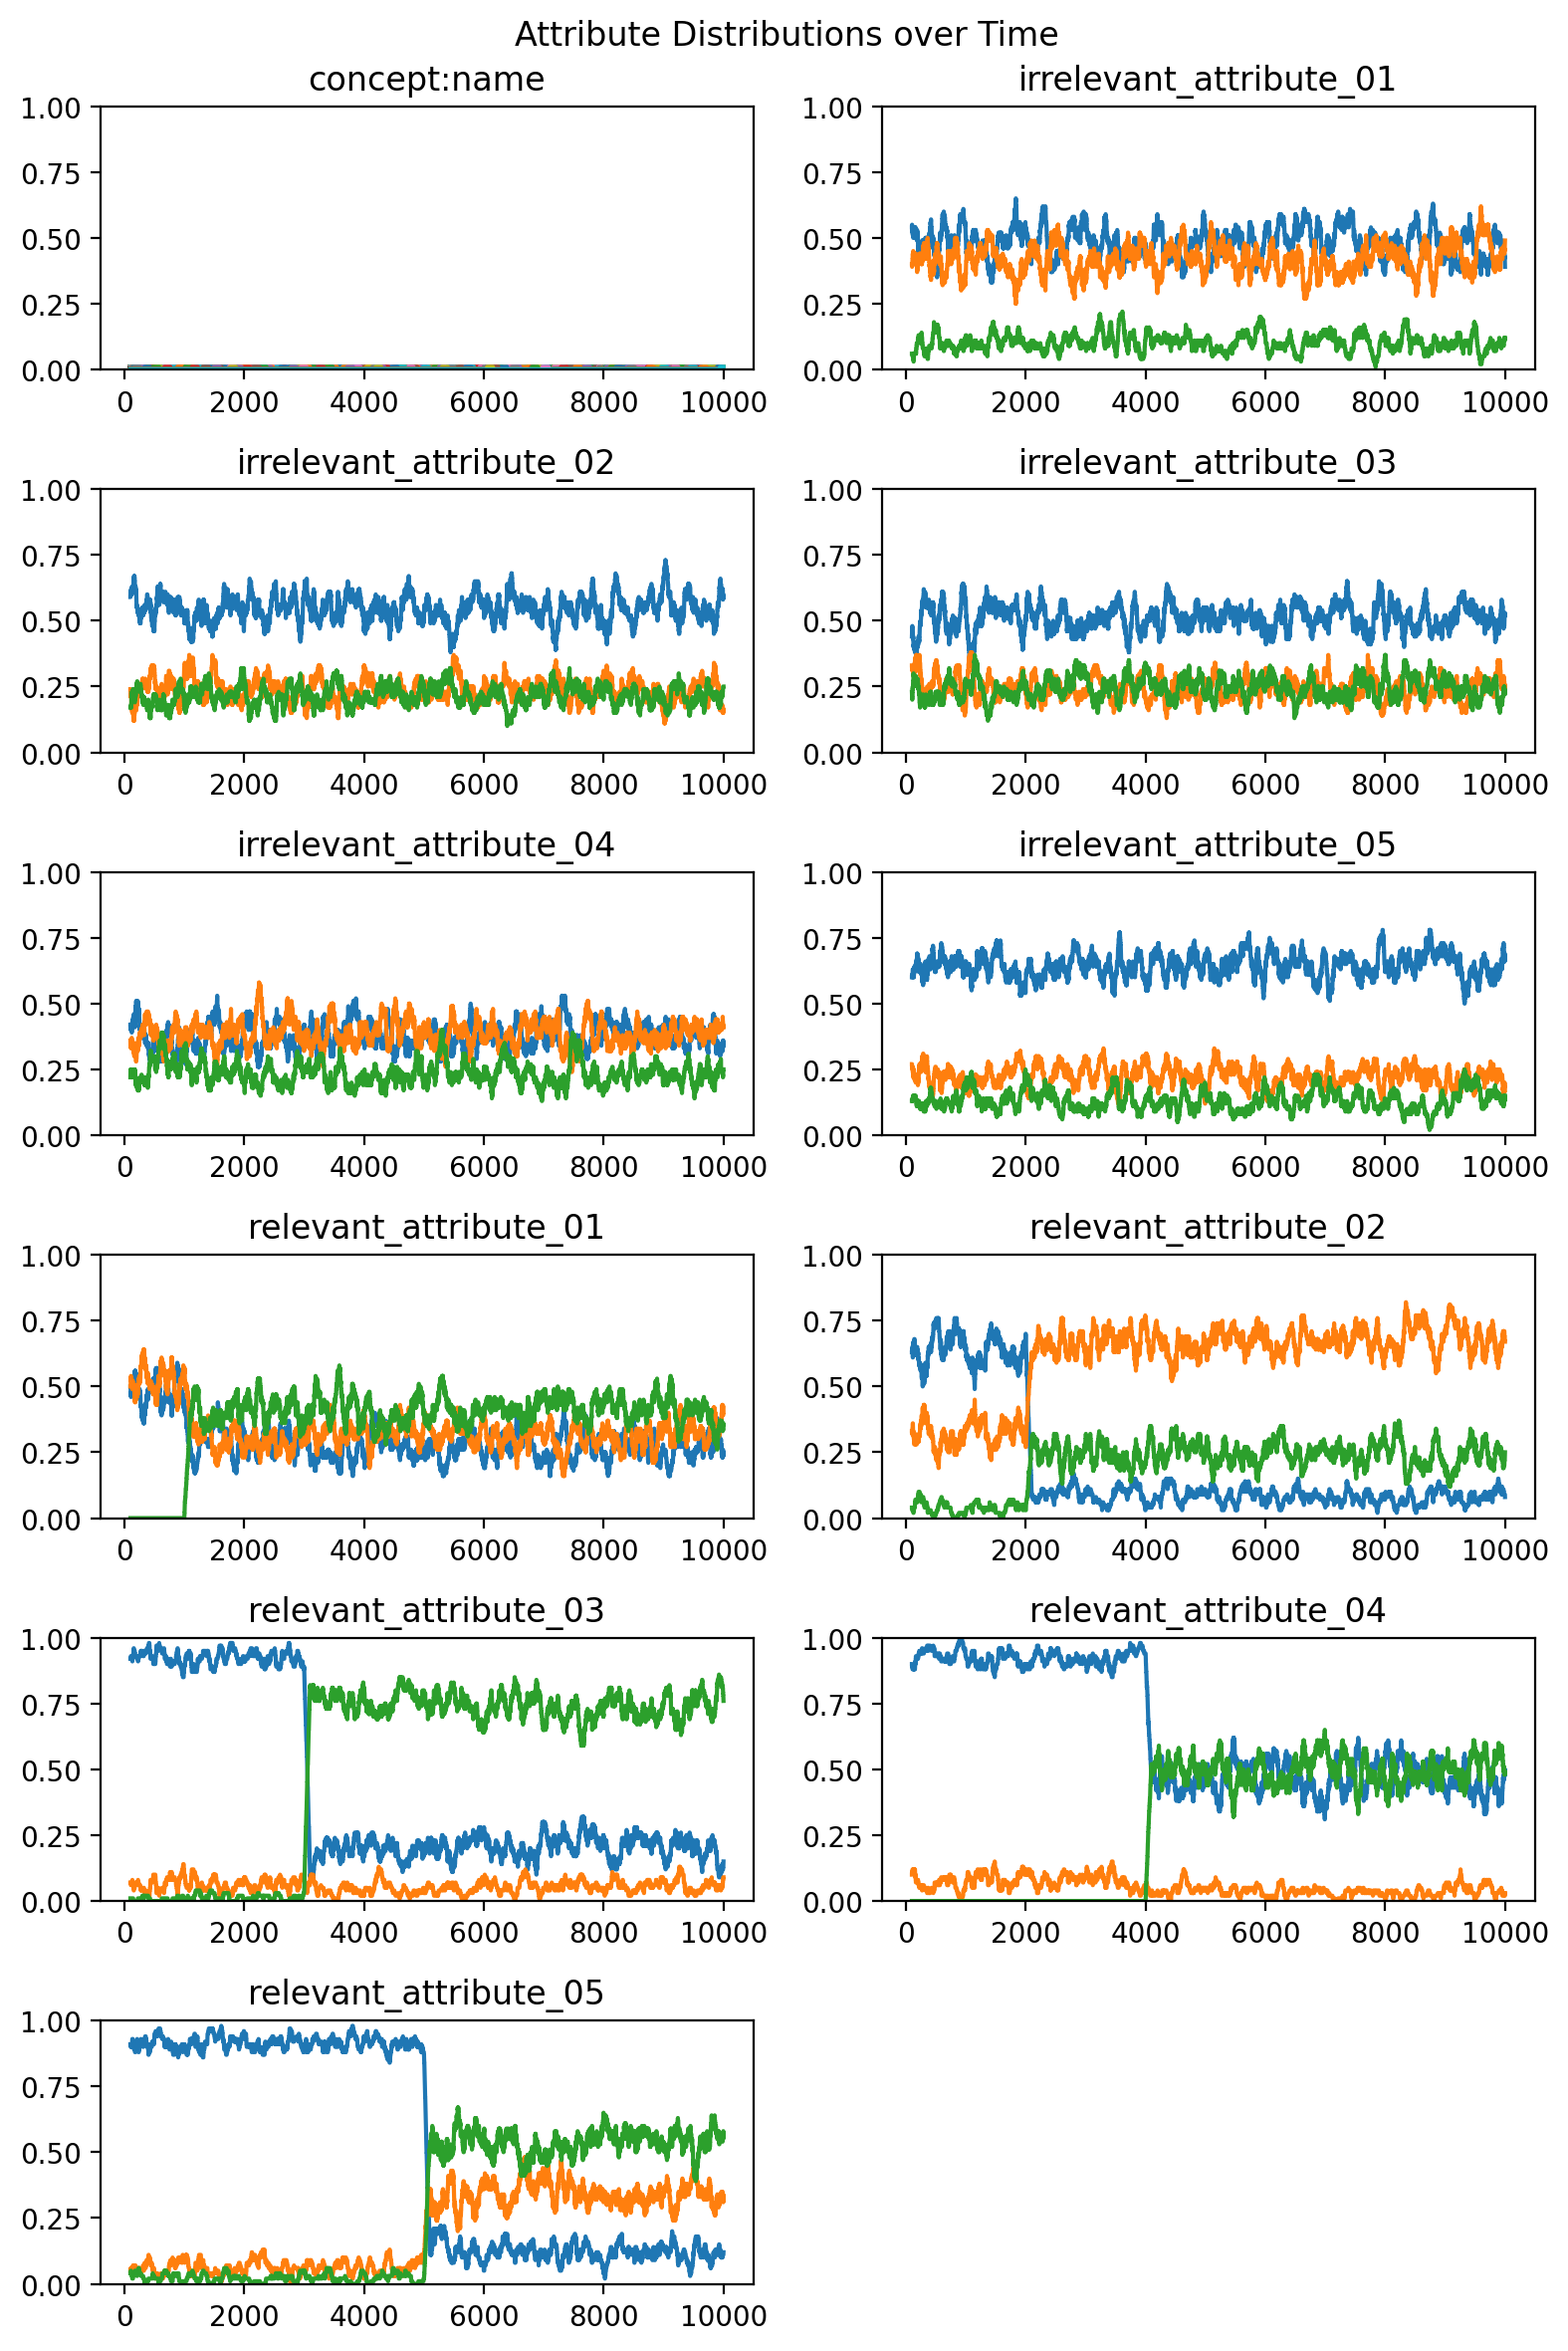

In [22]:
columns = 2

# plot all attribute distributions in a plot with subplots
n = len(attribute_distributions.keys())
rows = max(1, int(math.ceil(n / columns))) # set the row count to at least 1

gs = gridspec.GridSpec(rows, columns)
fig = plt.figure(dpi=200, figsize = (8,2*rows))

# get sorted attribute list
attribute_list = sorted(list(attribute_distributions.keys()))

# plot all attribute distributions
for i, attribute_name in enumerate(attribute_list):
    series = attribute_distributions[attribute_name]
    ax = fig.add_subplot(gs[i])
    ax.plot(series)
    # set the y axis to 0 - 1
    plt.ylim(0, 1)
    ax.title.set_text(attribute_name)

# add a title
fig.suptitle('Attribute Distributions over Time')

fig.tight_layout()

plt.show()